### Checkpoint 6: Decision Tree & Random Forest

## Exercice 1: Read your Titanic dataset as usual: Training set and Testing set Apply decision tree. 

First step:Data preprocessing

In [3]:

#Importing our dataset from csv file

import pandas as pd
dataset=pd.read_csv("titanic-passengers.csv", sep=";")

#Preprocessing our data

def preprocess_data(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
    new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    new_data['Cabin']=new_data.Cabin.fillna('G6')
    new_data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
    return new_data
data=preprocess_data(dataset)

data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.00,G6,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.65,F G73,S


Second step: Choose the most relevant features

In [4]:
#features extraction
x=data.drop(["Survived", "PassengerId", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
y= data["Survived"]
x.head(2)


,Pclass,Sex,Age,SibSp,Parch,Fare
0,2,1,28.0,0,0,13.00
1,3,1,25.0,0,0,7.65


third step: splitting and data applying tree algorithm

In [5]:
#splitting data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

#applying tree algorithm
from sklearn import tree

clf = tree.DecisionTreeClassifier()  
clf.fit(x_train, y_train)   #fitting our model
y_pred=clf.predict(x_test)   # evaluating our model

from sklearn.metrics import accuracy_score
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.776536312849162


## Exercice 2: Plot your decision tree and try to read the tree branches and conclude a prediction manually

Step Onne: plot the decision tree

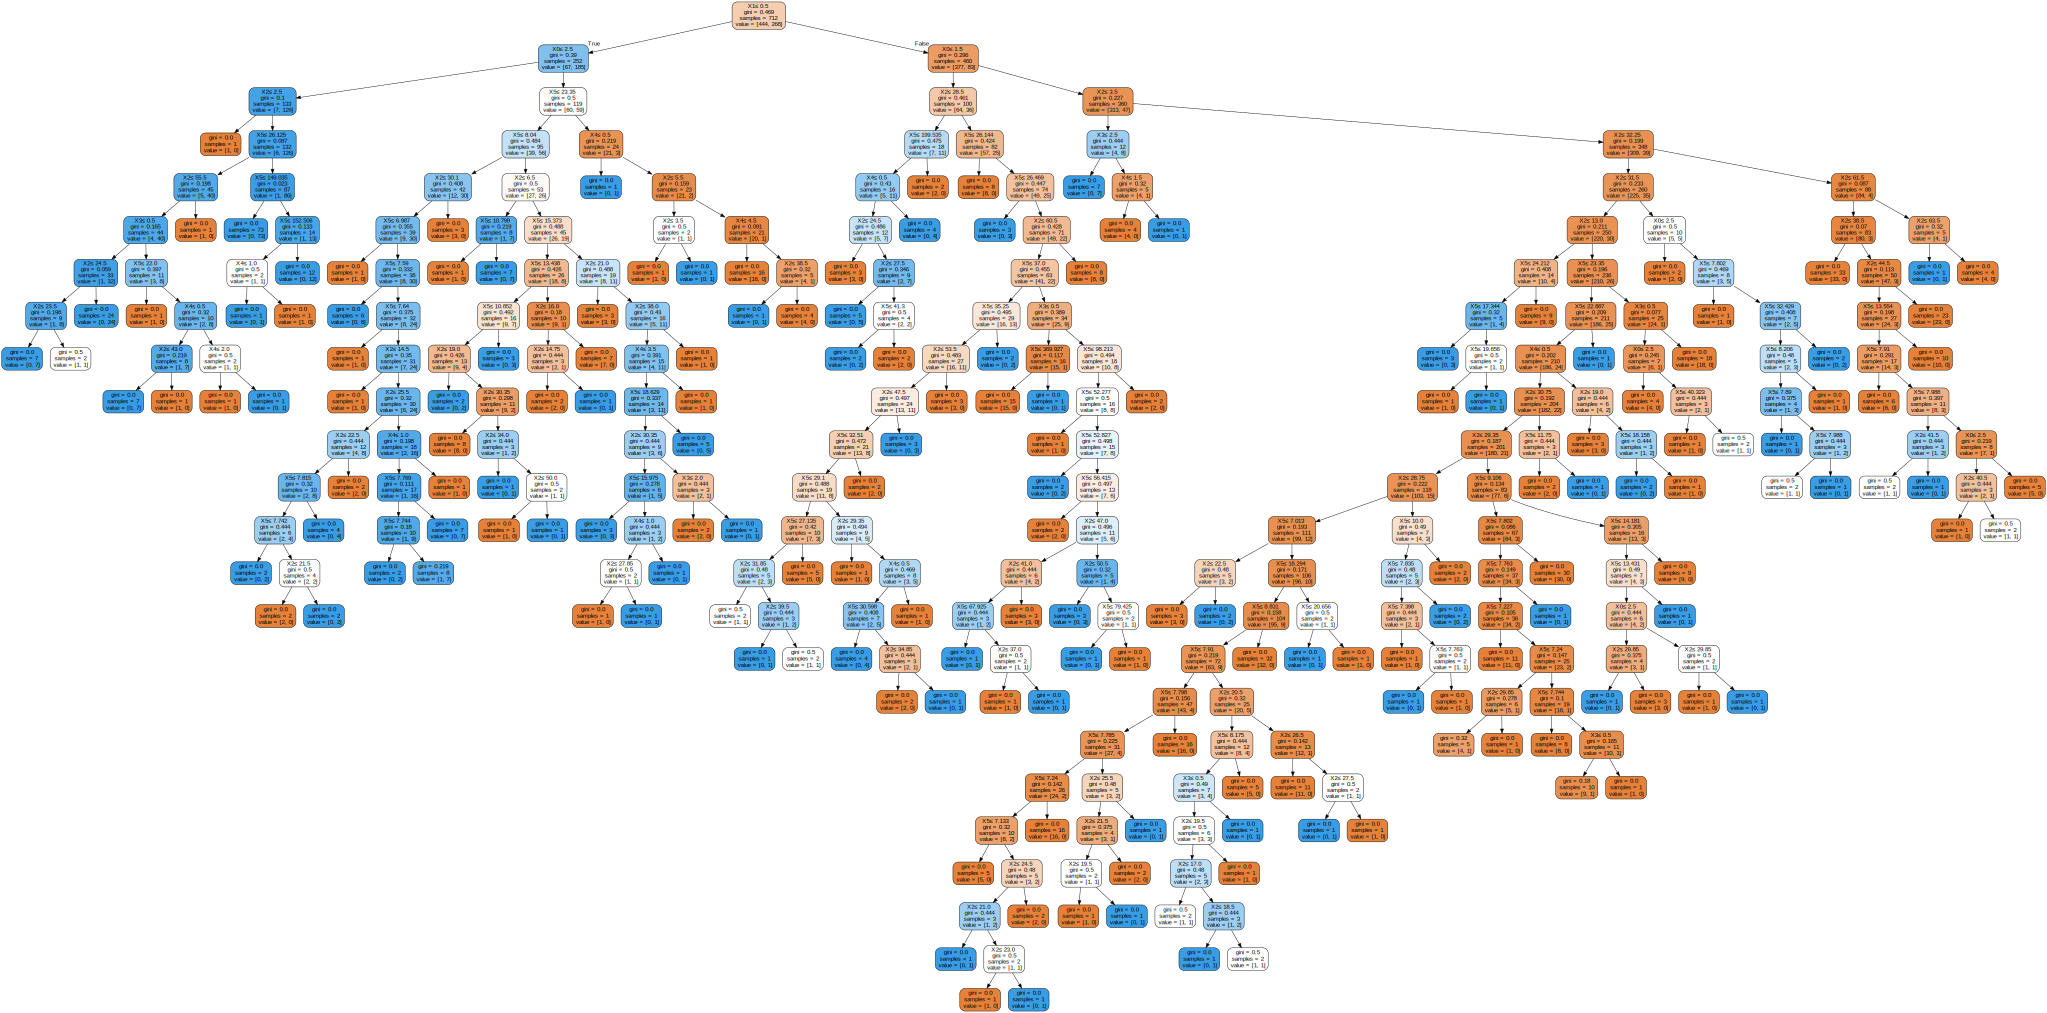

In [6]:
import graphviz

    
    # our model is classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from graphviz import Source


dot_data=tree.export_graphviz(clf, out_file=None,  
                filled=True, 
                rounded=True,

                special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("data")
graph

Lest's try to perdict manually if the passenger zero: 'Mr. Erik Gustaf' if Suvived or not?


In [7]:
data.head(2)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.00,G6,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.65,F G73,S


1) Mr Gustave is a male? True like 256 other peaple in this sample: (X
1) ≤ 0.5
2) Mr Gustave is traveling in class 1 or 2? True like 133 other male: (X0) ≤ 2.5
3) Mr Gustave is also over 2.5 years old? True like 132 other people (X) 2≤ 2.5
4) Mr Gustave also paid a lower rate than 26.125? True like 45 other people: (X5) ≤ 26.125
5) Mr gustave is also under 55.5 age? True like 44 other people (X) 2≤ 55.5
6) Mr Gustave also has a Number of Siblings / Spouses less than 0.5? True as 33 people on board. X3 ≤ 0.5
7) Mr gustave is also under 24.5 age? false like another 24 person on board
8) value = [0, 24] so Mr gustave probably survived!

## Exercice 3) Change the decision tree parameters(change at least two parameters)

## Exercice 4) Calculate the new accuracy and compare it with the previous results. 

Step One: Pruning the tree

In [8]:
clf = tree.DecisionTreeClassifier(criterion = "gini", splitter= 'random', max_leaf_nodes = 10, min_samples_leaf = 5, max_depth= 5)
clf.fit(x_train, y_train)   #fitting our model
y_pred=clf.predict(x_test)


Step 2: Evaluate the model

In [9]:
from sklearn.metrics import accuracy_score
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.776536312849162


Step 3 : Plot the new tree

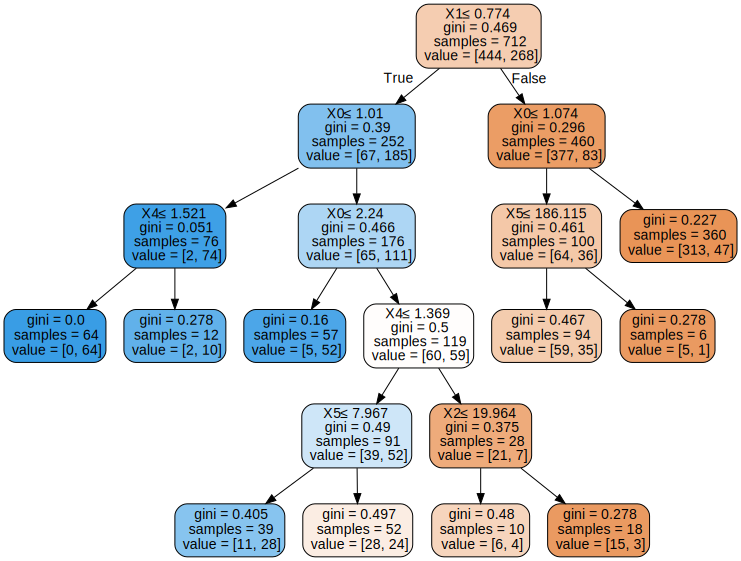

In [10]:
dot_data=tree.export_graphviz(clf, out_file=None,  
                filled=True, 
                rounded=True,

                special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("data")
graph

score:0.8100558659217877


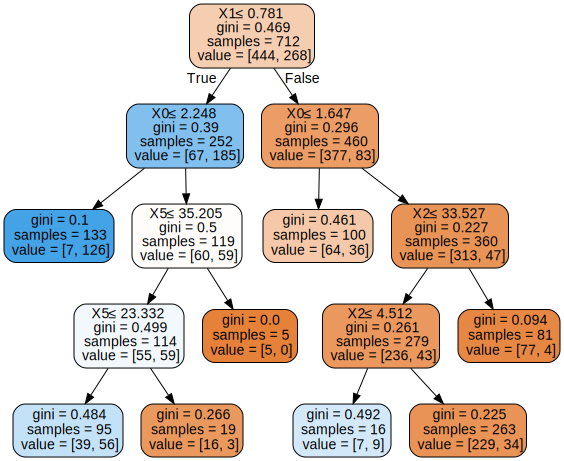

In [11]:
## Let's try with a Lower parameters

clf = tree.DecisionTreeClassifier(criterion = "gini", splitter= 'random', max_leaf_nodes = 8, min_samples_leaf = 4, max_depth= 4)
clf.fit(x_train, y_train)   #fitting our model
y_pred=clf.predict(x_test)
print("score:{}".format(accuracy_score(y_test, y_pred)))

dot_data=tree.export_graphviz(clf, out_file=None,  
                filled=True, 
                rounded=True,

                special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("data")
graph

score:0.8044692737430168


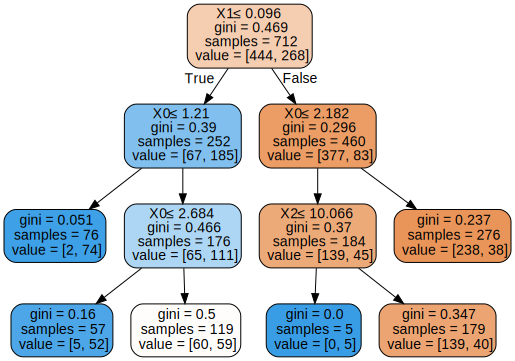

In [12]:
## Let's try with  lower max_leaf_nodes and max_depth

clf = tree.DecisionTreeClassifier(criterion = "gini", splitter= 'random', max_leaf_nodes = 6, min_samples_leaf = 4, max_depth= 3)
clf.fit(x_train, y_train)   #fitting our model
y_pred=clf.predict(x_test)
print("score:{}".format(accuracy_score(y_test, y_pred)))
dot_data=tree.export_graphviz(clf, out_file=None,  
                filled=True, 
                rounded=True,

                special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("data")
graph

score:0.7877094972067039


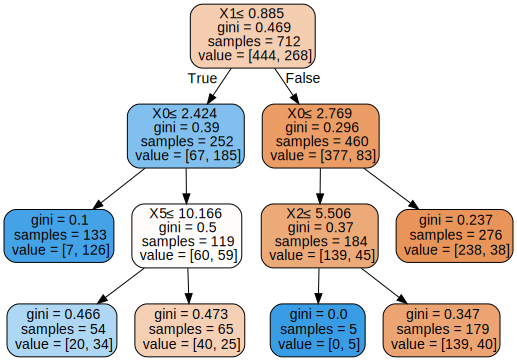

In [13]:
## Lest's try with a min_samples_leaf = 3

clf = tree.DecisionTreeClassifier(criterion = "gini", splitter= 'random', max_leaf_nodes = 6, min_samples_leaf = 3, max_depth= 3)
clf.fit(x_train, y_train)   #fitting our model
y_pred=clf.predict(x_test)
print("score:{}".format(accuracy_score(y_test, y_pred)))
dot_data=tree.export_graphviz(clf, out_file=None,  
                filled=True, 
                rounded=True,

                special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("data")
graph

Although we have significantly reduced the size of our tree. the relevance of the model does not change. And the order of the featyres remains the same

## Exerciece 5) Use random forest then change the number of estimators

## Exercice 6) Calculate the new accuracy and compare it with the previous result.

Step 1) Import Library and split data

In [14]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics  # Importing metrics to test accuracy


x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3,random_state=20) #splitting data with test size of 30%

Step 2) Testing our model with n_estimators=10

In [15]:
clf1=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 100 decision trees
clf1.fit(x_train, y_train)  #Training our model
y_pred=clf1.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.8097014925373134


We obtain a precision of the model equal to decision tree percedent


Step 3) Augmenter le nombre des estimateurs

In [17]:
clf1=RandomForestClassifier(n_estimators=20)  #Creating a random forest with 100 decision trees
clf1.fit(x_train, y_train)  #Training our model
y_pred=clf1.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.8208955223880597


In [18]:
clf1=RandomForestClassifier(n_estimators=30)  #Creating a random forest with 100 decision trees
clf1.fit(x_train, y_train)  #Training our model
y_pred=clf1.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.7985074626865671


In [19]:
clf1=RandomForestClassifier(n_estimators=40)  #Creating a random forest with 100 decision trees
clf1.fit(x_train, y_train)  #Training our model
y_pred=clf1.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.8134328358208955



Increasing the number of estimators did not help increase the precision of the model

Step 4) Decrease the number of estimators

In [20]:
clf1=RandomForestClassifier(n_estimators=5)  #Creating a random forest with 100 decision trees
clf1.fit(x_train, y_train)  #Training our model
y_pred=clf1.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.7910447761194029


In [21]:
clf1=RandomForestClassifier(n_estimators=2)  #Creating a random forest with 100 decision trees
clf1.fit(x_train, y_train)  #Training our model
y_pred=clf1.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.7985074626865671


Decreasing the number of estimators did not contribute to increasing the precision of the model

Thank you 